# Exploratory Data Analysis: IMDb Dataset

In this notebook, we will explore IMDb’s dataset which is available online and refreshed daily.

https://www.imdb.com/interfaces/

Seven gzipped files (tab-separated values) can be downloaded from the website. Files are:

- title.akas.tsv.gz
- title.basics.tsv.gz
- title.crew.tsv.gz
- title.episode.tsv.gz
- title.principals.tsv.gz
- title.ratings.tsv.gz
- name.basics.tsv.gz

We will go through each of them one by one except “title.episode.tsv.gz” as we are only interested in movies in the notebook, not TV series.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

sns.set(style="darkgrid")
sns.set_palette("pastel")

Loading huge tables from IMDb dataset into our notebook takes a while; hence, we will do it once and save them in .sav format which is allowed by pickle library of Python, this will speed up data loading processes

In [2]:
### import pandas as pd
### import pickle

# Load and save each table into separate .sav files
### files = ["title.akas.tsv.gz", "title.basics.tsv.gz", "title.crew.tsv.gz", "title.principals.tsv.gz",
###         "title.ratings.tsv.gz", "name.basics.tsv.gz"]

### for file in files:
###     print(f"Processing {file}...")
###     df = pd.read_csv(file, sep="\t", low_memory=False, na_values=["\\N", "nan"])
###     pickle.dump(df, open(file[:-7] + ".sav", "wb"))

### print("Data loading and saving completed.")

### Rating Table

title.ratings.tsv.gz — Contains the IMDb rating and votes information for titles

- **tconst** (string) — alphanumeric unique identifier of the title
- **averageRating** — weighted average of all the individual user ratings
- **numVotes** — number of votes the title has received

In [3]:
df_ratings = pickle.load(open("title.ratings.sav","rb"))
df_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1969
1,tt0000002,5.8,263
2,tt0000003,6.5,1815
3,tt0000004,5.6,178
4,tt0000005,6.2,2612


The **ratings** table contains over 1 million movie rating entries

In [4]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308743 entries, 0 to 1308742
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1308743 non-null  object 
 1   averageRating  1308743 non-null  float64
 2   numVotes       1308743 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 30.0+ MB


**Average Rating:**

- The average rating for the entries in the dataset is approximately 6.95.
- The standard deviation is around 1.38, indicating a moderate amount of variation in the ratings.
- The minimum rating is 1, while the maximum rating is 10.
- The 25th percentile is 6.2, meaning that 25% of the ratings fall below this value.
- The median (50th percentile) is 7.1, indicating that half of the ratings are above this value.
- The 75th percentile is 7.9, so 75% of the ratings are below this value.

**Number of Votes:**

- The average number of votes received for the entries is approximately 1,039.
- The standard deviation is quite high at around 17,434, indicating a wide range of vote counts.
- The minimum number of votes is 5, while the maximum is 2,736,020.
- The 25th percentile is 11, meaning that 25% of the entries received 11 votes or fewer.
- The median (50th percentile) is 26, indicating that half of the entries received 26 votes or more.
- The 75th percentile is 101, so 75% of the entries received 101 votes or fewer.

In [5]:
df_ratings.describe()

,averageRating,numVotes
count,1.308743e+06,1.308743e+06
mean,6.950970e+00,1.039055e+03
std,1.383464e+00,1.743428e+04
min,1.000000e+00,5.000000e+00
25%,6.200000e+00,1.100000e+01
50%,7.100000e+00,2.600000e+01
75%,7.900000e+00,1.010000e+02
max,1.000000e+01,2.736020e+06


Average rating distribution shows a classic negative skewed distribution where the median is larger than mean. Vote count distribution is heavily clustered around small values (0–1000 votes). Therefore we need to do a bit extra to visualise this packed distribution

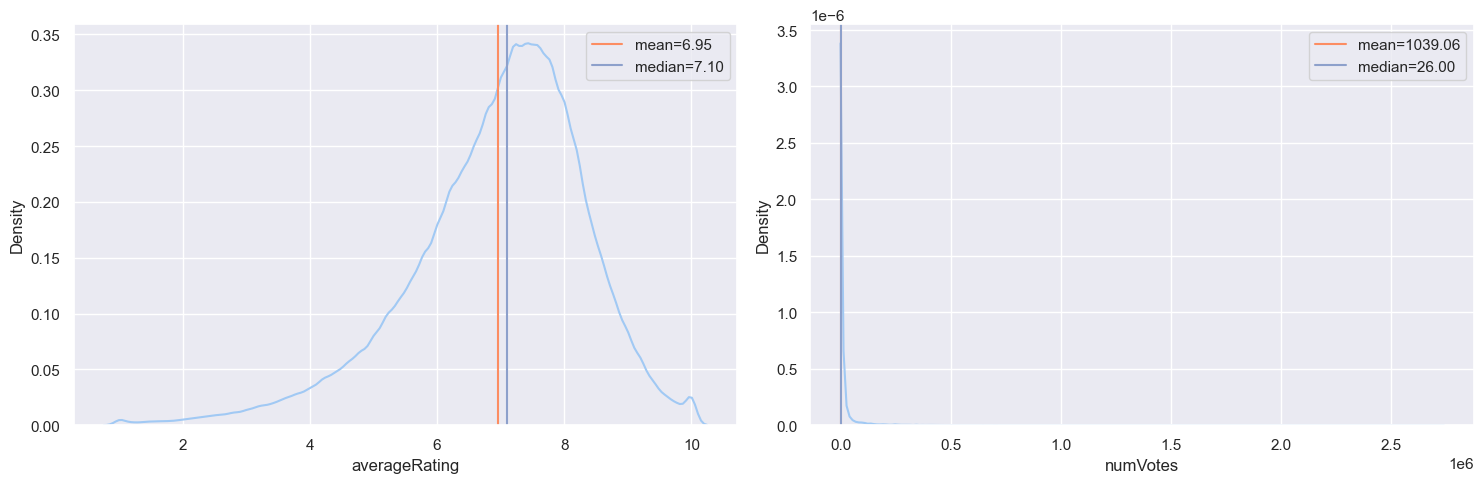

In [6]:
ratings = dict(mean=df_ratings.averageRating.mean(),
              median=df_ratings.averageRating.median())
votes = dict(mean=df_ratings.numVotes.mean(),
             median=df_ratings.numVotes.median())

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
ax1 = sns.kdeplot(df_ratings.averageRating)
ax1.axvline(x=ratings["mean"], c=sns.color_palette("Set2")[1], label=f"mean={ratings['mean']:.2f}")
ax1.axvline(x=ratings["median"], c=sns.color_palette("Set2")[2], label=f"median={ratings['median']:.2f}")
plt.legend()

plt.subplot(1, 2, 2)
ax2 = sns.kdeplot(df_ratings.numVotes)
ax2.axvline(x=votes["mean"], c=sns.color_palette("Set2")[1], label=f"mean={votes['mean']:.2f}")
ax2.axvline(x=votes["median"], c=sns.color_palette("Set2")[2], label=f"median={votes['median']:.2f}")
plt.legend()

plt.tight_layout()
plt.show()

Let’s try to use pandas.qcut function, which discretizes the variable into equal-sized buckets based on rank or based on sample quantiles. Let’s divide our data into 20 buckets and visualise:

Over 140K samples (more than 10%) have only 5 votes counted
The films having more than 1095 votes are represented with a single bar in the plot which counts around 50K (these are the significant/popular films we are mostly interested in)

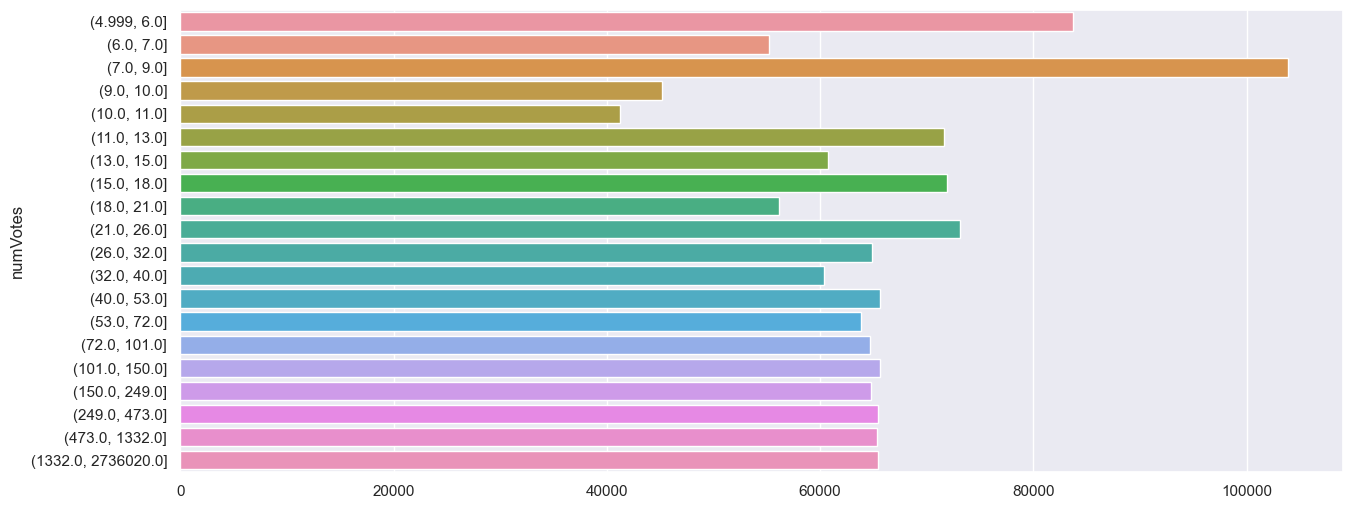

In [7]:
buckets = 20
plt.figure(figsize=(15,6))
bins = pd.qcut(df_ratings.numVotes,buckets,duplicates="drop").value_counts()
sns.barplot(x=bins.values,y=bins.index,orient="h")
plt.show()

Also, we can consider plotting the distribution on a logarithmic scale which reveals more. Since it is a count variable, it looks more like a Poisson distribution

C:\Users\K.S.shirodkar\AppData\Local\Temp\ipykernel_9420\519582272.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df_ratings.numVotes,kde=False)


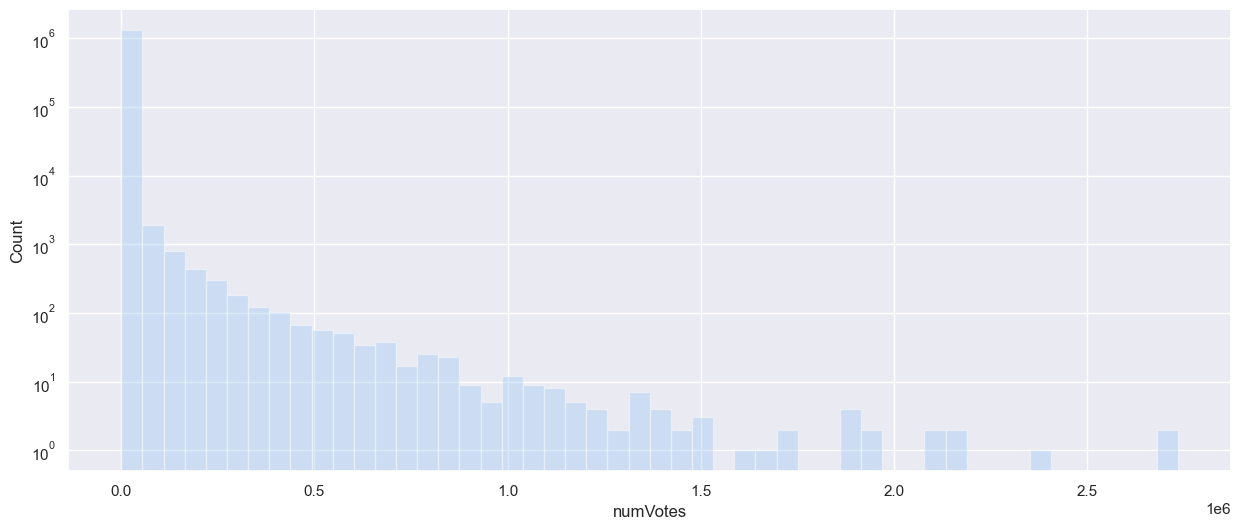

In [8]:
plt.figure(figsize=(15,6))
ax=sns.distplot(df_ratings.numVotes,kde=False)
ax.set_ylabel("Count")
ax.set_yscale("log")

### Title Basics Table

**title.basics.tsv.gz** — Contains the following information for titles:

- **tconst** (string) — alphanumeric unique identifier of the title
- **titleType** (string) — the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- **primaryTitle** (string) — the more popular title / the title used by the filmmakers on promotional materials at the point of release
- **originalTitle** (string) — original title, in the original language
- **isAdult** (boolean) — 0: non-adult title; 1: adult title
- **startYear** (YYYY) — represents the release year of a title. In the case of TV Series, it is the series start year
- **endYear** (YYYY) — TV Series end year. ‘\N’ for all other title types
- **runtimeMinutes** — primary runtime of the title, in minutes
- **genres** (string array) — includes up to three genres associated with the title

In [9]:
df_title_basics = pickle.load(open("title.basics.sav","rb"))
df_title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1,"Comedy,Short"


Title basics table is way larger than the ratings table with over 6 million entries each of which describes basic information about the video titles. I used the word “video” as it not only includes films but also tv series, short videos (short films and music clips), even video games

In [10]:
df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840002 entries, 0 to 9840001
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  object 
 8   genres          object 
dtypes: float64(3), object(6)
memory usage: 675.7+ MB


Let’s explore columns one by one. Title type distribution is as follows:

- Majority of the titles are TV episodes (76%)
- Movies (including TV movies) only cover 8% of the dataset

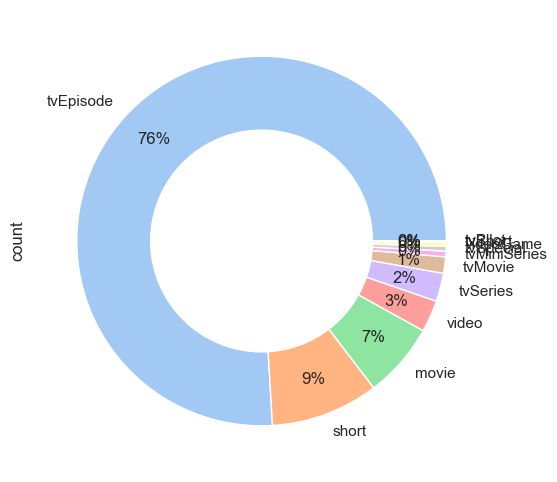

In [11]:
df_title_basics.titleType.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),
                                                  pctdistance=0.8,
                                                  wedgeprops=dict(width=0.4))
plt.show()

Let’s trim dataset as we are interested only in the movies. After trimming is done the majority of the titles now are movies (82%) and the remaining 120K titles are TV movies

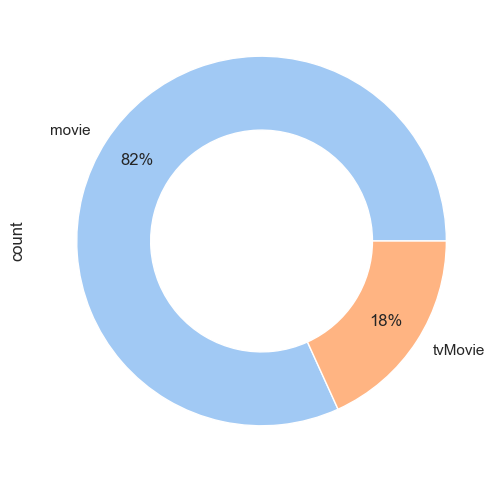

In [12]:
df_title_basics = df_title_basics[df_title_basics.isAdult == 0]
df_title_basics.drop(["isAdult","endYear"],axis=1,inplace=True)
df_title_basics = df_title_basics[(df_title_basics.titleType == "movie") | (df_title_basics.titleType == "tvMovie")]
df_title_basics.titleType.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,
                                                 wedgeprops=dict(width=0.4))
plt.show()

Now about the distribution of Genres, the pie chart below doesn’t look Good. It is because movies have multiple genres, therefore what we see below is a combination of genres each representing a slice in the pie

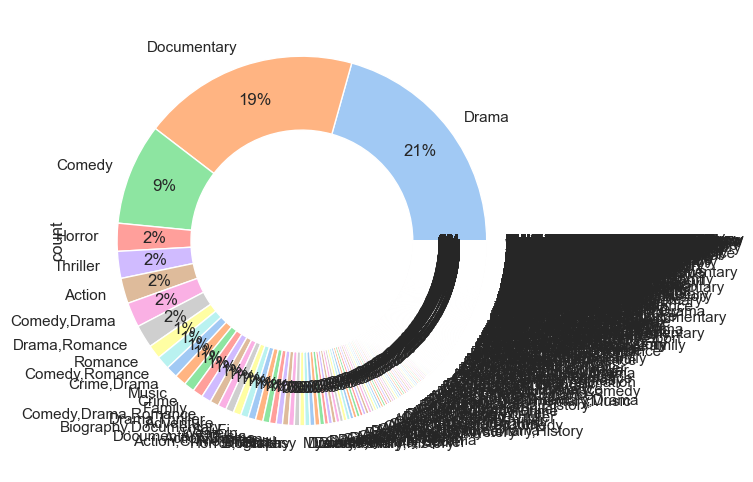

In [13]:
df_title_basics.genres.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,
                                              wedgeprops=dict(width=0.4))
plt.show()

To overcome this, we can use Scikit-Learn’s CountVectorizer feature extraction technique to detect and count each unique genre (e.g. drama, comedy, etc). We will create a new column for each unique Genre title and it will be True/False if a movie has that genre or not

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

temp = df_title_basics.genres.dropna()
vec = CountVectorizer(token_pattern=r'(?u)\b\w+\b', analyzer='word').fit(temp)
bag_of_genres = vec.transform(temp)
unique_genres = np.array(list(vec.vocabulary_.keys()))
unique_genres

array(['romance', 'documentary', 'news', 'sport', 'action', 'adventure',
       'biography', 'drama', 'fantasy', 'comedy', 'war', 'crime',
       'family', 'history', 'sci', 'fi', 'thriller', 'western', 'mystery',
       'horror', 'music', 'animation', 'musical', 'film', 'noir', 'short',
       'adult', 'reality', 'tv', 'talk', 'show', 'game'], dtype='<U11')

It did very well by finding unique genres and counting them. Note that, in the bar chart below, since a movie may have multiple genres at a time, their count will not be 100%

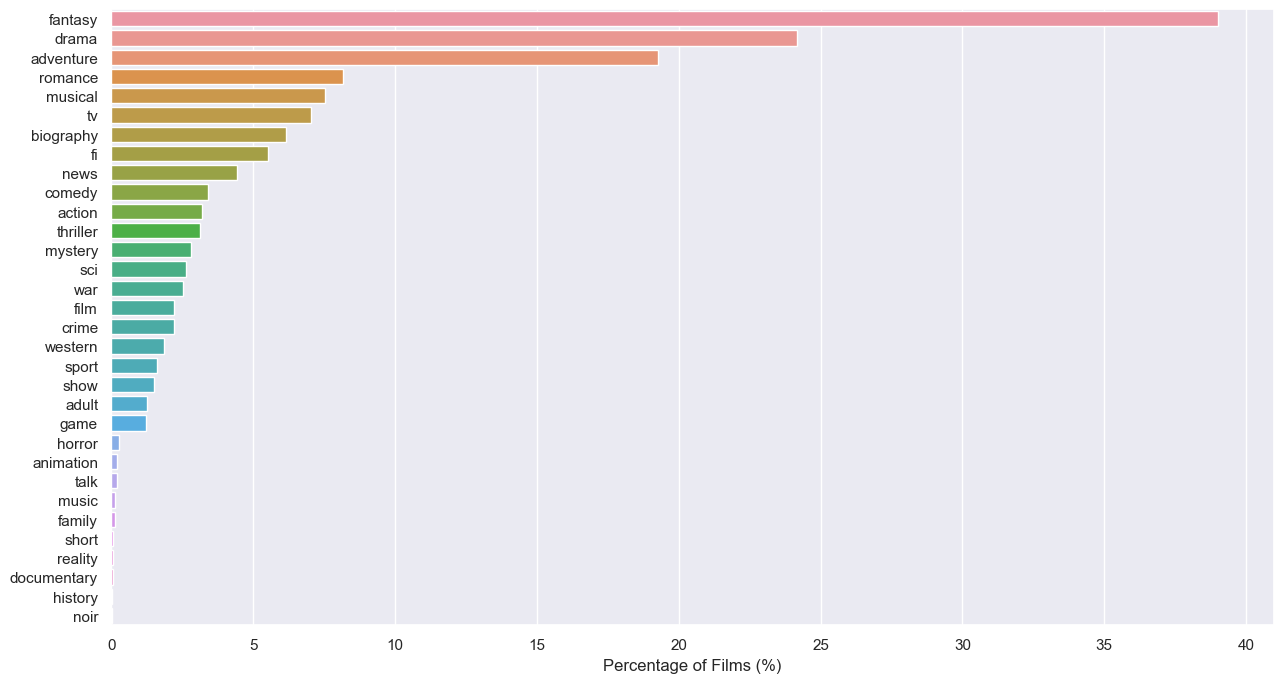

In [15]:
genres = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres,index=temp.index)
sorted_genres_perc = 100*pd.Series(genres.sum()).sort_values(ascending=False)/genres.shape[0]
plt.figure(figsize=(15,8))
sns.barplot(x=sorted_genres_perc.values,y=sorted_genres_perc.index,orient="h")
plt.xlabel("Percentage of Films (%)")
plt.show()

How about the trend for the number of voters per year and voter counts per year/per film?

The graph below contains two subplots, the former gives the total number of films made each year, and the latter gives a total number of voters for the films made at the corresponding year which was peaked in 2013 (37 million vote count total for the films released in 2013) and follows a dramatic decline in the count. This is where things get interesting. The number of films made per year increases until 2017 but why people stop voting recent films? Is it because of the quality of movies getting worse? Or is it the IMDb website losing its popularity? However, it is obvious that IMDb still dominates the online film rating sector as their mind-blowing monthly visitor number reaches to 250 million.

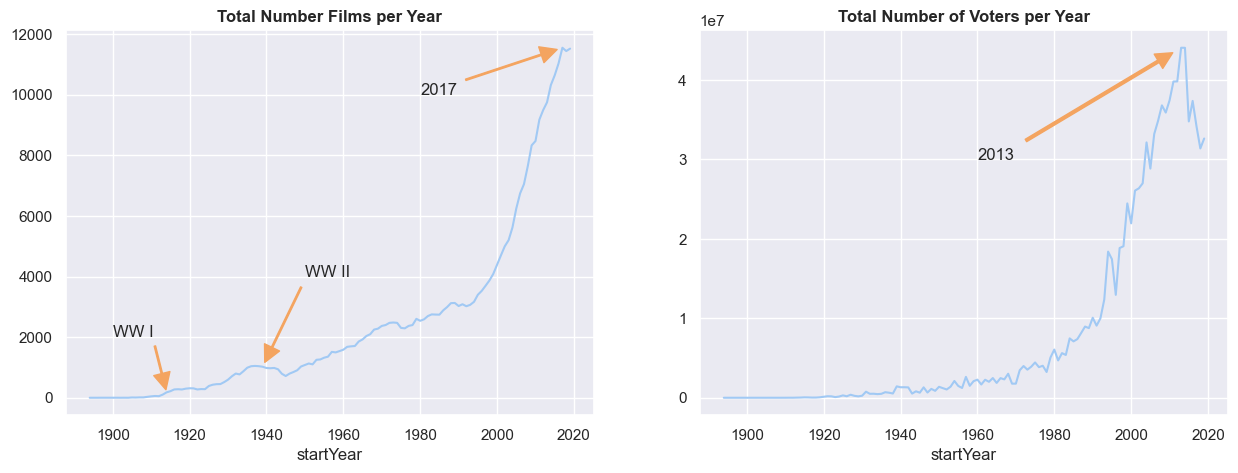

In [16]:
merged_temp = pd.merge(df_ratings,df_title_basics,on="tconst",how="left")
merged_temp = merged_temp[(merged_temp.startYear.notnull())&(merged_temp.startYear<2020)]
counts_yearly = merged_temp.groupby("startYear").agg({"averageRating":[np.median],
                                                     "numVotes":[np.sum,np.size,lambda x: np.sum(x)/np.size(x)]})
max_count_year = counts_yearly[("numVotes","sum")].idxmax().astype(int)
max_year = counts_yearly[("numVotes","size")].idxmax().astype(int)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax =counts_yearly[("numVotes","size")].plot()
ax.annotate(max_year,xy=(max_year,counts_yearly[("numVotes","size")].max()),
            xytext=(1980,10000), arrowprops=dict(color="sandybrown",shrink=0.05,width=1))
ax.annotate("WW I",xy=(1914,counts_yearly[("numVotes","size")].loc[1914]), xytext=(1900,2000), 
            arrowprops=dict(color="sandybrown",shrink=0.05,width=1))
ax.annotate("WW II",xy=(1939,counts_yearly[("numVotes","size")].loc[1939]), xytext=(1950,4000), 
            arrowprops=dict(color="sandybrown",shrink=0.05,width=1))
plt.title("Total Number Films per Year",fontweight="bold")
plt.subplot(1,2,2)
ax =counts_yearly[("numVotes","sum")].plot()
ax.annotate(max_count_year,xy=(max_count_year,counts_yearly[("numVotes","sum")].max()),
            xytext=(1960,3e7),arrowprops=dict(shrink=0.05,color="sandybrown",width=2))
plt.title("Total Number of Voters per Year",fontweight="bold")
plt.show()

This could be another research point, let’s continue to find more interesting points in the data.

The graph below has two subplots again. The former gives the average rating of films per year, whereas the latter displays the average voters per film again on a yearly basis. Since the 1920s, average film ratings tend to fluctuate but not showing a monotonic increase/decrease trend.

The latter graph reaches its peak in the 90s and early 2000s and has been dropping dramatically since then. Recall that the total number of voters per year was peaked in 2013, not 90s. This means that **90s films got the attention of users the most**. This can be related to the dominance of the age group of the IMDb voters. Since we don’t have that information, we can guess that the dominant age group must be in the range of 30 to 50. 90s films are their childhood or teenage times films which you get impressed the most of a film huh? There could be other factors like the 90s films are better etc.

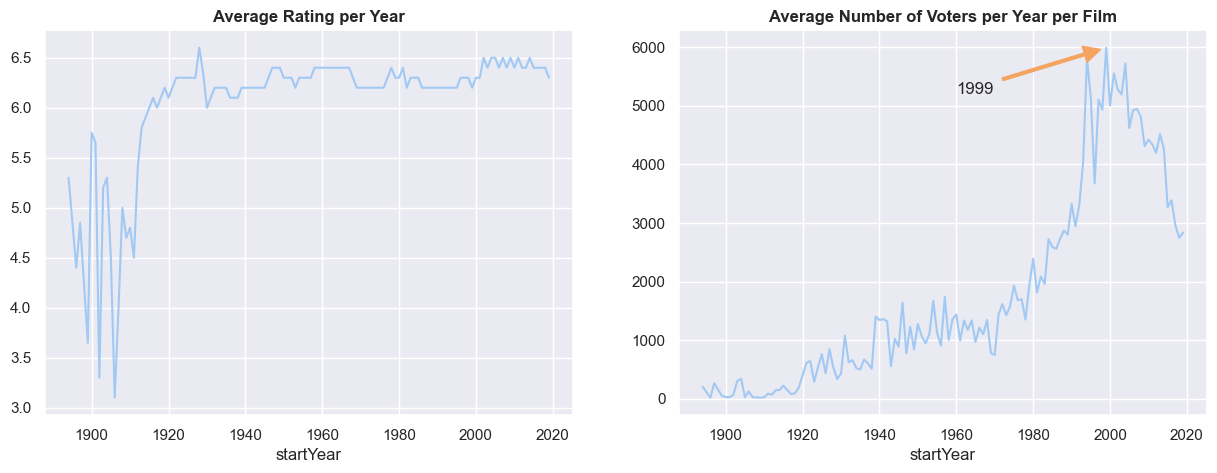

In [17]:
max_count_year_per_film = counts_yearly[("numVotes","<lambda_0>")].idxmax().astype(int)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax =counts_yearly[("averageRating","median")].plot()
plt.title("Average Rating per Year",fontweight="bold")
plt.subplot(1,2,2)
ax = counts_yearly[("numVotes","<lambda_0>")].plot()
ax.annotate(max_count_year_per_film,xy=(max_count_year_per_film,counts_yearly[("numVotes","<lambda_0>")].max()),
            xytext=(1960,5200),arrowprops=dict(shrink=0.05,color="sandybrown",width=2))
plt.title("Average Number of Voters per Year per Film",fontweight="bold")
plt.show()


Let’s now visualise the distribution of film **runtimes** in minutes. The single bar below is an indication that there are a few **outlier films** which have a runtime over 50000 minutes

C:\Users\K.S.shirodkar\AppData\Local\Temp\ipykernel_9420\1998855285.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_title_basics.runtimeMinutes.dropna().astype(int),bins=50)


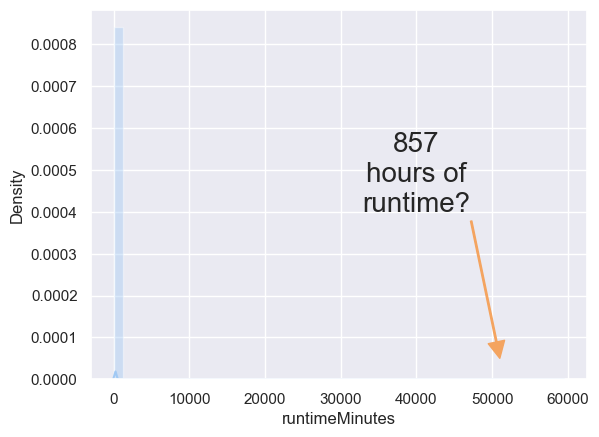

In [18]:
sns.distplot(df_title_basics.runtimeMinutes.dropna().astype(int),bins=50)
plt.gca().annotate("857\nhours of\nruntime?",xy=(51000,0.00005),xytext=(40000,0.0004),
                   fontsize=20, ha="center",
                   arrowprops=dict(color="sandybrown",width=1))
plt.show()

In [19]:
import warnings
warnings.filterwarnings("ignore")
use = df_title_basics[df_title_basics.runtimeMinutes.notnull()]
use["runtimeMinutes"] = use.runtimeMinutes.astype(int)
use[use.runtimeMinutes>50000]

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
1437146,tt10844584,movie,100,100,2019.0,59460,Drama
5853307,tt22899684,movie,Searching for America: United States,Searching for America: United States,2026.0,54321,Documentary
9083774,tt8273150,movie,Logistics,Logistics,2012.0,51420,Documentary


It is **Logistics (2012)**, longest made documentary ever. A 72 minutes long edit can be seen in the following YouTube link:

https://www.youtube.com/watch?v=QYFG0xP12yE

Many may not consider it a form of art, rather a camera placed on top of a container ship and kept shooting it 35 days. Another being Ambiancé.Artist Anders Weberg has stated that he made Ambiancé **as a protest against the re-creation of old, classic films**. As of 2016, Weberg had claimed to have completed 400 hours of footage and that in order to complete the film by its release date he must film 7 to 8 hours of raw footage each week.

In [20]:
use.sort_values(by="runtimeMinutes",ascending=False).head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
1437146,tt10844584,movie,100,100,2019.0,59460,Drama
5853307,tt22899684,movie,Searching for America: United States,Searching for America: United States,2026.0,54321,Documentary
9083774,tt8273150,movie,Logistics,Logistics,2012.0,51420,Documentary
7104244,tt3854496,movie,Ambiancé,Ambiancé,2020.0,43200,Documentary
2229805,tt12277054,movie,Carnets Filmés (Liste Complète),Carnets Filmés (Liste Complète),2019.0,28643,Documentary


In order to see a clear distribution of “films”, we need to take these outliers off from the data and plot the rest. We will do that by focusing only on the movies with **300 minutes** runtime or less:

- Now it looks like a normal distribution centered around 90 minutes

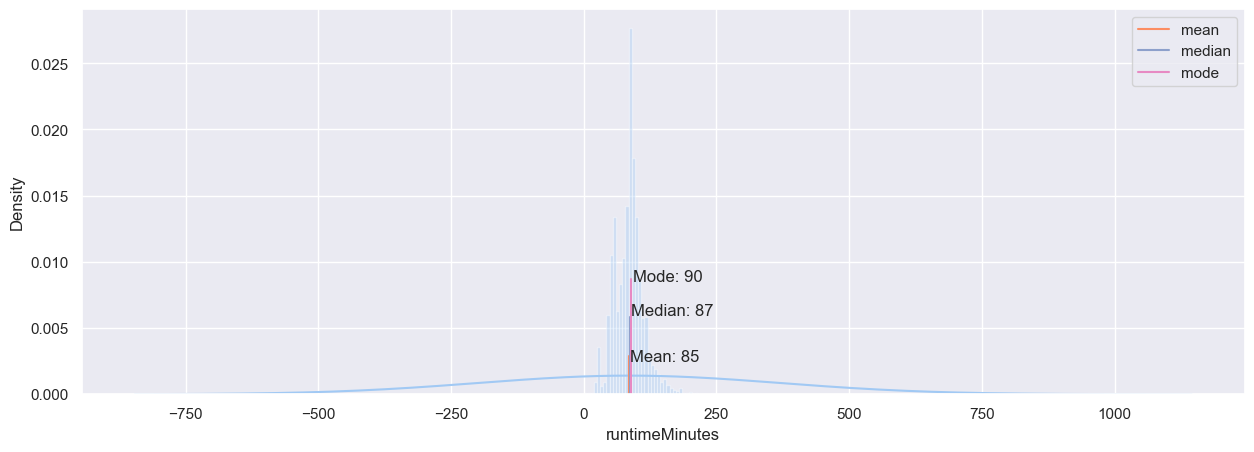

In [21]:
rt = use.runtimeMinutes[use.runtimeMinutes<300]
mean_rt,median_rt,mode_rt = rt.mean(),rt.median(),rt.mode()[0]
plt.figure(figsize=(15,5))
sns.distplot(rt,kde_kws=dict(bw=10))
plt.gca().axvline(mean_rt,label="mean",color=sns.color_palette("Set2")[1],ymax=0.1)
plt.gca().axvline(median_rt,label="median",color=sns.color_palette("Set2")[2],ymax=0.2)
plt.gca().axvline(mode_rt,label="mode",color=sns.color_palette("Set2")[3],ymax=0.3)
plt.text(mean_rt+2,0.0025,f"Mean: {int(mean_rt)}")
plt.text(median_rt+2,0.006,f"Median: {int(median_rt)}")
plt.text(mode_rt+2,0.0085,f"Mode: {int(mode_rt)}")
plt.legend()
plt.show()

Now list the **Top 20 movies with the highest voter count**, first we need to merge df_ratings and df_title_basics tables and sort the table according to the number of votes:

- Popular movies like Fight Club, The Matrix, Lord of the Rings trio are made the list as expected
- Except for The Godfather, Top20 voted films are from the 90s to the present

In [22]:
merged = pd.merge(df_ratings,df_title_basics,on="tconst",how="right").sort_values(by="numVotes",ascending=False)
merged[["numVotes","primaryTitle","startYear"]].iloc[:20,:]

,numVotes,primaryTitle,startYear
83420,2736020.0,The Shawshank Redemption,1994.0
237889,2709223.0,The Dark Knight,2008.0
369016,2404908.0,Inception,2010.0
98276,2178527.0,Fight Club,1999.0
82372,2129124.0,Forrest Gump,1994.0
83210,2102567.0,Pulp Fiction,1994.0
96357,1951864.0,The Matrix,1999.0
90030,1910645.0,The Lord of the Rings: The Fellowship of the Ring,2001.0
50848,1902711.0,The Godfather,1972.0
252320,1899991.0,Interstellar,2014.0


Let’s find out the **Top 20 highest-rated films**, we will use the merged table again by just sorting it with averageRating. Like Top250 top-rated films of the IMDb website we will put a precondition to avoid listing “unknown” high rated films. Therefore we will only take into consideration of films which received ratings from at least 25000 users:

- It is still not the same as Top250 of IMDb website since a Turkish film called “Hababam Sinifi” tops our list with 9.4 average rating
- This was because their Top250 list is ranked by a formula which includes the number of ratings each movie received from users, and value of ratings received from **regular users**
- Since we do not have regular users information, we cannot filter them
- The highest-rated film is "The Shawshank Redemption" with an average rating of 9.3, followed closely by "The Godfather" with a rating of 9.2. These films have received a significant number of votes, indicating their popularity among IMDb users.
- The presence of multiple films from "The Lord of the Rings" trilogy, including "The Return of the King" and "The Two Towers," suggests a high level of appreciation for the epic fantasy adventure series.
- The genres of the top-rated films vary, with dramas, crime, and adventure being the most common. This demonstrates that quality storytelling and engaging narratives are valued by IMDb users.

In [23]:
merged[merged.numVotes>25000].sort_values(by="averageRating",ascending=False).head(20)

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
83420,tt0111161,9.3,2736020.0,movie,The Shawshank Redemption,The Shawshank Redemption,1994.0,142,Drama
50848,tt0068646,9.2,1902711.0,movie,The Godfather,The Godfather,1972.0,175,"Crime,Drama"
152944,tt0252487,9.2,41639.0,movie,The Chaos Class,Hababam Sinifi,1975.0,87,"Comedy,Drama"
540683,tt2592910,9.1,46693.0,movie,CM101MMXI Fundamentals,CM101MMXI Fundamentals,2013.0,139,"Comedy,Documentary"
110606,tt0167260,9.0,1881842.0,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,2003.0,201,"Action,Adventure,Drama"
655658,tt5354160,9.0,27501.0,movie,Mirror Game,Aynabaji,2016.0,147,"Crime,Mystery,Thriller"
36013,tt0050083,9.0,809776.0,movie,12 Angry Men,12 Angry Men,1957.0,96,"Crime,Drama"
237889,tt0468569,9.0,2709223.0,movie,The Dark Knight,The Dark Knight,2008.0,152,"Action,Crime,Drama"
53156,tt0071562,9.0,1296989.0,movie,The Godfather Part II,The Godfather Part II,1974.0,202,"Crime,Drama"
81205,tt0108052,9.0,1381188.0,movie,Schindler's List,Schindler's List,1993.0,195,"Biography,Drama,History"


Let’s now list the Worst rated 20 films:

- The lowest-rated film on the list is "Cumali Ceber" with an average rating of 1.0, followed by "Reis" and "Sadak 2" with the same rating. These films have received a significant number of votes, indicating a widespread dislike among IMDb users.
- Many of the lowest-rated films on the list are relatively recent releases, with the majority released in the 2000s and 2010s. This may indicate that these films failed to meet the expectations or preferences of the audience during their respective time periods.
- Some of the real bad films are Disaster Movie, Supebabies, Epic Movie, Meet the Spartans, etc.

In [24]:
merged[merged.numVotes>25000].sort_values(by="averageRating",ascending=True).head(20)

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
712377,tt7221896,1.0,39196.0,movie,Cumali Ceber,Cumali Ceber: Allah Seni Alsin,2017.0,100,Comedy
675641,tt5988370,1.0,73825.0,movie,Reis,Reis,2017.0,108,"Biography,Drama"
730060,tt7886848,1.2,96221.0,movie,Sadak 2,Sadak 2,2020.0,133,"Action,Drama"
677212,tt6038600,1.2,39850.0,movie,Smolensk,Smolensk,2016.0,120,"Drama,Thriller"
163011,tt0270846,1.5,31338.0,movie,Superbabies: Baby Geniuses 2,Superbabies: Baby Geniuses 2,2004.0,88,"Comedy,Family,Sci-Fi"
396331,tt14723224,1.5,39301.0,movie,The Cost of Deception,Elk*rtuk,2021.0,125,"Action,Crime,Drama"
638749,tt4884540,1.6,42908.0,movie,Angels Apocalypse,Angels Apocalypse,2015.0,85,"Action,Fantasy,Sci-Fi"
441925,tt1702443,1.6,76347.0,movie,Justin Bieber: Never Say Never,Justin Bieber: Never Say Never,2011.0,105,"Documentary,Music"
44612,tt0060666,1.6,36857.0,movie,Manos: The Hands of Fate,Manos: The Hands of Fate,1966.0,70,Horror
624149,tt4458206,1.7,27605.0,movie,Code Name: K.O.Z.,Kod Adi K.O.Z.,2015.0,114,"Crime,Mystery"


Let’s visualise average ratings (median) of film genres. We will use the same counter which we used above:

- Highest rating average is taken by documentaries and news categories (both political)
- horror and sci-fi are in the bottom of the list (could be due to too many nonsense examples in both)

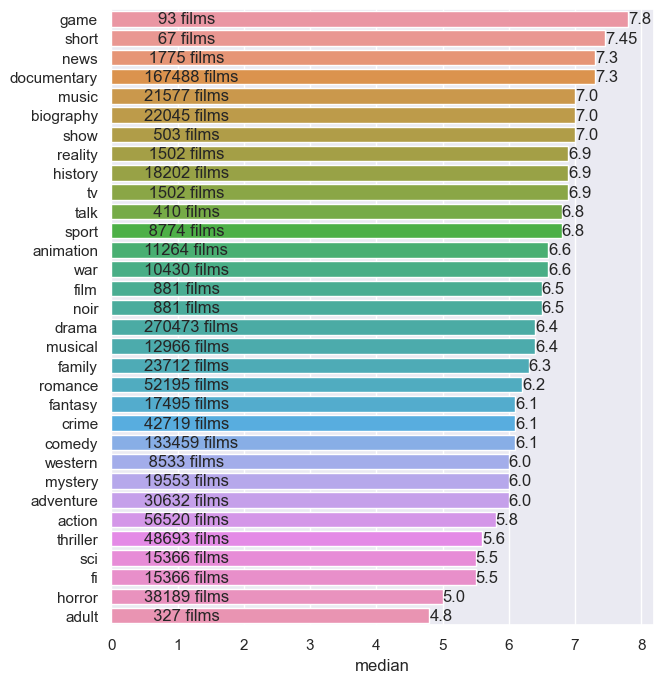

In [25]:
merged_temp = merged[merged.genres.notnull()]
vec = CountVectorizer(token_pattern=r'(?u)\b\w+\b', analyzer='word').fit(merged_temp.genres)
bag_of_genres = pd.DataFrame(vec.transform(merged_temp.genres).todense(),
                             columns=vec.get_feature_names_out(), index=merged_temp.index)
merged_temp = pd.concat([merged_temp, bag_of_genres], axis=1)

rating_counts_means = pd.DataFrame([[merged_temp.averageRating[merged_temp[i] == 1].median(), merged_temp[i].sum()] 
                                    for i in vec.get_feature_names_out()],
                                   columns=["median", "count"], index=vec.get_feature_names_out()).sort_values("median", ascending=False)
plt.figure(figsize=(7,8))
sns.barplot(y=rating_counts_means.index,x=rating_counts_means["median"],orient="h")
for i,counts in enumerate(rating_counts_means["count"]):
    plt.text(0.5,i+0.25,f"{counts:>5} films")
    plt.text(rating_counts_means["median"][i],i+0.25,rating_counts_means["median"][i])
plt.show()

Do users tend to rate higher on movies with longer runtime? Let’s find out:

- Runtimes of movies are grouped using pandas’ qcut (bins are chosen automatically by qcut to distribute an equal number of samples for each group)
- Outlier films are not visualised in the boxplot
- Boxplot medians (vertical lines in each bin) show that the **average rating tends to increase when movie runtime increases**
- The reason that films with 84m and less runtime being exception could be that this group contains a lot of **animation films** which have high rates

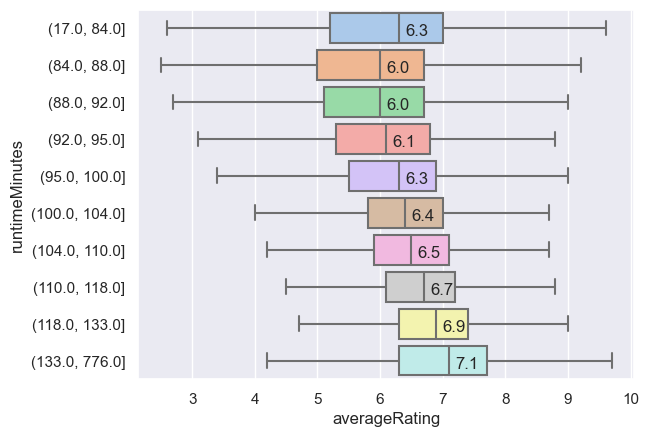

In [26]:
use = merged_temp[merged_temp.numVotes>1000]
use["runtimeMinutes"] = pd.to_numeric(use.runtimeMinutes)
[groups,edges] = pd.qcut(use.runtimeMinutes,10,precision=0,retbins=True)
ratings_avg = use.groupby(groups).agg({"averageRating":np.median})
sns.boxplot(y=groups,x="averageRating",data=use,orient="h",showfliers=False)
for i,rate in enumerate(ratings_avg["averageRating"]):
    plt.text(rate+0.1,i+0.2,rate)
plt.show()

### Name Basics Table

name.basics.tsv.gz — Contains the following information for names:

- **nconst** (string) — alphanumeric unique identifier of the name/person
- **primaryName** (string)– name by which the person is most often credited
- **birthYear** — in YYYY format
- **deathYear** — in YYYY format if applicable, else ‘\N’
- **primaryProfession** (array of strings)– the top-3 professions of the person
- **knownForTitles** (array of tconsts) — titles the person is known for

In [27]:
df_name_basics = pickle.load(open("name.basics.sav","rb"))
df_name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0045537,tt0050419"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0075213,tt0117057,tt0037382"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,soundtrack,music_department","tt0049189,tt0057345,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,soundtrack,writer","tt0078723,tt0072562,tt0080455,tt0077975"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0060827"


The table has almost **12 million names** coming from different professions such as actors, actresses, directors, writers, etc. It contains their birth and death year info as well as their most known work of art

In [28]:
df_name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12515722 entries, 0 to 12515721
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   nconst             object 
 1   primaryName        object 
 2   birthYear          float64
 3   deathYear          float64
 4   primaryProfession  object 
 5   knownForTitles     object 
dtypes: float64(2), object(4)
memory usage: 572.9+ MB


The birth year distribution of the persons in the dataset is displayed below. The dataset contains even ancient writers from year 4 A.D.

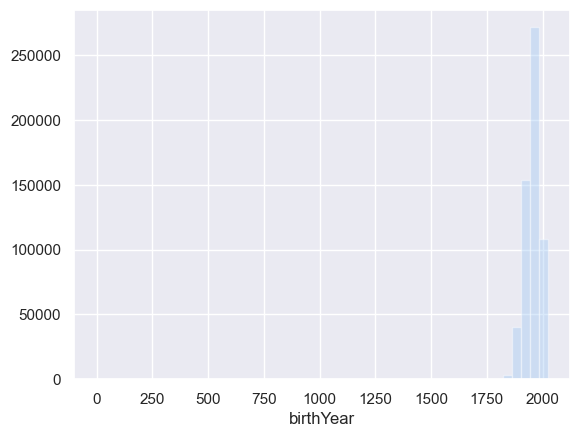

In [29]:
sns.distplot(df_name_basics.birthYear.dropna(),kde=False)
plt.show()

The **Top 10 ancient persons** in the dataset:

- Lucio Anneo Seneca was born in 4AD being the most ancient person in the dataset
- Some entries have wrong birth/death year info such as negative lifespans or extreme lifespans

In [30]:
df_name_basics.sort_values("birthYear").head(10)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
137426,nm0144482,Xavier Castano,1.0,NaN,"assistant_director,producer,director","tt0870921,tt0338512,tt2909116,tt1701210"
738946,nm0784172,Lucio Anneo Seneca,4.0,65.0,writer,"tt0237666,tt0218822,tt0972562,tt0049203"
8096624,nm4511421,Megan Liz Smith,12.0,NaN,"miscellaneous,actress","tt3416744,tt10183848,tt1966378,tt14300912"
5542606,nm1620433,Karen Abercrombie,13.0,NaN,"actress,producer,writer","tt25598548,tt3832914,tt7383268,tt8180386"
11541483,nm8810146,Paul Walsh,21.0,NaN,actor,"tt0083839,tt0314567,tt0093223,tt0098878"
407298,nm0430769,Flavius Josephus,37.0,95.0,"writer,miscellaneous","tt0049833,tt0273236,tt0009573,tt0237666"
3827212,nm1306202,Plutarch,46.0,122.0,writer,"tt0056937,tt0237666,tt0272979,tt0472473"
486875,nm0515385,Titus Livius,59.0,17.0,writer,tt0003740
11732675,nm9049180,Pliny the Younger,61.0,113.0,NaN,NaN
3832116,nm1306711,Suetonius,69.0,140.0,writer,"tt0092322,tt0056937,tt0237666,tt3395994"


Distribution of lifespans of persons in the dataset:

- Shows a negative skew where mode>median>mean which is expected for distributions showing age at death

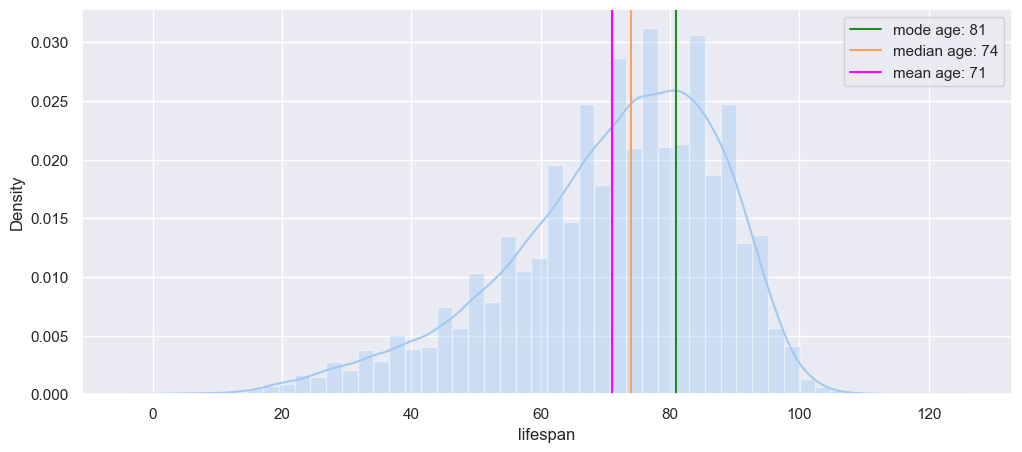

In [31]:
use = df_name_basics[["birthYear","deathYear","primaryName"]].dropna()
use["lifespan"] = use.deathYear - use.birthYear
use["lifespan"][(use.lifespan>200)|(use.lifespan<0)]=use.lifespan.median()
plt.figure(figsize=(12,5))
ax = sns.distplot(use.lifespan)
ax.axvline(use.lifespan.mode()[0],label=f"mode age: {int(use.lifespan.mode()[0])}",color="forestgreen")
ax.axvline(use.lifespan.median(),label=f"median age: {int(use.lifespan.median())}",color="sandybrown")
ax.axvline(use.lifespan.mean(),label=f"mean age: {int(use.lifespan.mean())}",color="fuchsia")
plt.legend()
plt.show()

Let’s find out Top 10 persons who have the longest lifespan in the dataset:

- Jeanne Louise Calment, died when she was 122 years of age, had longest confirmed human life span in history (https://en.wikipedia.org/wiki/Jeanne_Calment)
- Even though she did not take part in any movie whatsoever, she appeared in a documentary about her, which is why she is in our dataset

In [32]:
use.sort_values("lifespan",ascending=False).head(10)

,birthYear,deathYear,primaryName,lifespan
124317,1875.0,1997.0,Jeanne Louise Calment,122.0
230501,1849.0,1970.0,Tatzumbia Dupea,121.0
4000498,1398.0,1518.0,Kabir Das,120.0
1871243,1449.0,1568.0,Sankardev,119.0
7923143,1772.0,1890.0,Fakir Lalon Shah,118.0
231324,1879.0,1997.0,Durga Bai,118.0
6674777,1898.0,2015.0,Misao Ogawa,117.0
4235310,1877.0,1993.0,Charlotte Hughes,116.0
261514,1896.0,2012.0,Gustave Field,116.0
5816556,1893.0,2009.0,Maria De Jesus,116.0


### Title Crew Table

title.crew.tsv.gz — Contains the director and writer information for all the titles in IMDb. Fields include:

- **tconst** (string) — alphanumeric unique identifier of the title
- **directors** (array of nconsts) — director(s) of the given title
- **writers** (array of nconsts) — writer(s) of the given title

In [33]:
df_title_crew = pickle.load(open("title.crew.sav","rb"))
df_title_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,NaN
1,tt0000002,nm0721526,NaN
2,tt0000003,nm0721526,NaN
3,tt0000004,nm0721526,NaN
4,tt0000005,nm0005690,NaN


The table consists of **9.8 million** entries

In [34]:
df_title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840002 entries, 0 to 9840001
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     object
 1   directors  object
 2   writers    object
dtypes: object(3)
memory usage: 225.2+ MB


Some films have a large number of writers and directors. To analyse it, we need to combine three tables (title ratings, title crew, title basics)

In [35]:
merged = pd.merge(pd.merge(df_title_basics,df_title_crew,on="tconst",how="left"),df_ratings,on="tconst",how="left")
merged.head(10)

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,1894.0,45,Romance,nm0085156,nm0085156,5.3,204.0
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897.0,100,"Documentary,News,Sport",nm0714557,NaN,5.3,469.0
2,tt0000502,movie,Bohemios,Bohemios,1905.0,100,NaN,nm0063413,"nm0063413,nm0657268,nm0675388",4.1,15.0
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,70,"Action,Adventure,Biography",nm0846879,nm0846879,6.0,826.0
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,1907.0,90,Drama,nm0141150,nm0141150,4.4,20.0
5,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,1907.0,NaN,Drama,nm0533958,"nm0092809,nm0533958",4.3,24.0
6,tt0000630,movie,Hamlet,Amleto,1908.0,NaN,Drama,nm0143333,nm0000636,2.8,26.0
7,tt0000675,movie,Don Quijote,Don Quijote,1908.0,NaN,Drama,nm0194088,nm0148859,4.2,20.0
8,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908.0,120,"Adventure,Fantasy","nm0091767,nm0877783","nm0000875,nm0877783",5.1,67.0
9,tt0000838,movie,A Cultura do Cacau,A Cultura do Cacau,1909.0,NaN,NaN,nm0017074,NaN,NaN,NaN


In [36]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776221 entries, 0 to 776220
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          776221 non-null  object 
 1   titleType       776221 non-null  object 
 2   primaryTitle    776219 non-null  object 
 3   originalTitle   776219 non-null  object 
 4   startYear       681883 non-null  float64
 5   runtimeMinutes  496540 non-null  object 
 6   genres          693040 non-null  object 
 7   directors       691072 non-null  object 
 8   writers         589073 non-null  object 
 9   averageRating   337343 non-null  float64
 10  numVotes        337343 non-null  float64
dtypes: float64(3), object(8)
memory usage: 65.1+ MB


- The pie chart below says that it is not as common to have multiple directors (8%) for a film as compared to multiple writers (43%)
- The vast majority of films (91%) have a single director, almost 1/3 of films have a writer duo

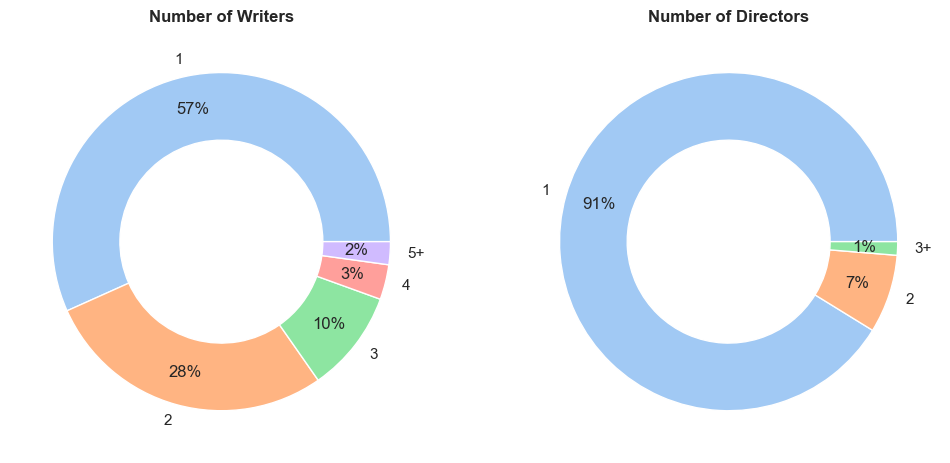

In [37]:
writer_counts = merged.writers.dropna().apply(lambda x: len(x.split(",")))
writer_counts[writer_counts>4] = "5+"
director_counts = merged.directors.dropna().apply(lambda x: len(x.split(",")))
director_counts[director_counts>2] = "3+"
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
writer_counts.value_counts().plot.pie(autopct="%.0f%%",pctdistance=0.8,
                                     wedgeprops=dict(width=0.4))
plt.title("Number of Writers",fontweight="bold")
plt.ylabel(None)
plt.subplot(1,2,2)
director_counts.value_counts().plot.pie(autopct="%.0f%%",pctdistance=0.8,
                                     wedgeprops=dict(width=0.4))
plt.title("Number of Directors",fontweight="bold")
plt.ylabel(None)
plt.show()

Some extreme number of writers for a movie:

- The Impact have 69 writers
- 60 Seconds to Die have 64 writers
- 50 kisses producers promotes the film with the following motto: “50 writers. 50 filmmakers. One picture.”

In [38]:
writer_counts = merged.writers.dropna().apply(lambda x: len(x.split(",")))
temp = merged[["startYear","primaryTitle","writers"]].loc[writer_counts.nlargest(5).index]
temp["Writer Count"] = writer_counts.nlargest(5)
temp

,startYear,primaryTitle,writers,Writer Count
459784,2022.0,The Impact,"nm13554276,nm13554262,nm13554263,nm13554290,nm...",69
640597,2017.0,60 Seconds to Die,"nm3781891,nm4214737,nm3859710,nm2449187,nm5204...",64
604906,2022.0,Ted Bundy Had a Son,"nm8657020,nm5755088,nm8657022,nm8657023,nm8468...",60
352296,1987.0,DTV Monster Hits,"nm0767572,nm0813583,nm0908243,nm0003061,nm0006...",58
679366,2016.0,Spain in a Day,"nm13077330,nm13077328,nm13428397,nm13077327,nm...",52


Also top films with a high number of directors:

- **Ted Bundy Had a Son** becomes the top film now with staggering **86 directors**

In [39]:
director_counts = merged.directors.dropna().apply(lambda x: len(x.split(",")))
temp = merged[["startYear","primaryTitle","directors"]].loc[director_counts.nlargest(5).index]
temp["Director Count"] = director_counts.nlargest(5)
del merged, merged_temp
temp

,startYear,primaryTitle,directors,Director Count
604906,2022.0,Ted Bundy Had a Son,"nm5755088,nm8657022,nm8468009,nm3324251,nm7486...",86
610210,2016.0,World of Death,"nm6775503,nm14825517,nm4718923,nm1121352,nm467...",85
571640,2013.0,Venice 70: Future Reloaded,"nm0001408,nm0681311,nm0000934,nm0541391,nm1765...",74
345753,2009.0,24 Hours Berlin,"nm0374657,nm0013121,nm0046251,nm0061088,nm0067...",69
640597,2017.0,60 Seconds to Die,"nm3781891,nm0019144,nm14277594,nm3859710,nm536...",66


Now let’s do some analysis on the success of directors. We need to make our own success criteria first. The first criteria came to my mind is the average rating score of a director. Again we will need to put some thresholds to eliminate unknown local directors. Thresholds:

- Films with 25000 and more votes are accepted only
- Directors with 3 or more films are accepted only
- Directors with a median 100K voter counts accepted only

We are looking to find out successful directors who have an international impact. To do this we will need to combine all four tables which we examined until now.

In [40]:
director_temp = df_title_crew.drop("writers",axis=1)
director_temp.columns = ["tconst","nconst"]
director_temp.nconst = director_temp.nconst.dropna().apply(lambda x: x.split(",")[0])
directors = pd.merge(pd.merge(pd.merge(df_title_basics,df_ratings,on="tconst"),
                          director_temp,on="tconst"),
                 df_name_basics[["nconst","primaryName"]],on="nconst")
del director_temp
directors.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,primaryName
0,tt0000009,movie,Miss Jerry,Miss Jerry,1894.0,45,Romance,5.3,204,nm0085156,Alexander Black
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897.0,100,"Documentary,News,Sport",5.3,469,nm0714557,Enoch J. Rector
2,tt0000502,movie,Bohemios,Bohemios,1905.0,100,NaN,4.1,15,nm0063413,Ricardo de Baños
3,tt0000941,movie,Locura de amor,Locura de amor,1909.0,45,Drama,4.4,25,nm0063413,Ricardo de Baños
4,tt0001184,movie,Don Juan de Serrallonga,Don Juan de Serrallonga,1910.0,58,"Adventure,Drama",3.8,21,nm0063413,Ricardo de Baños


Tables are joined (inner) and the sample size of our new table became 331K rows. It contains 331K films with their director information

In [41]:
directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331192 entries, 0 to 331191
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          331192 non-null  object 
 1   titleType       331192 non-null  object 
 2   primaryTitle    331192 non-null  object 
 3   originalTitle   331192 non-null  object 
 4   startYear       331138 non-null  float64
 5   runtimeMinutes  298139 non-null  object 
 6   genres          320624 non-null  object 
 7   averageRating   331192 non-null  float64
 8   numVotes        331192 non-null  int64  
 9   nconst          331192 non-null  object 
 10  primaryName     331192 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 27.8+ MB


Now let’s group them and apply our thresholds to reveal the most successful 10 directors:

- The table lists the top 10 directors, ordered by their median film ratings. Also, median vote counts per film, as well as the director’s film counts, are given in the last column
- Christopher Nolan takes the first place in the list as he deserves, also my favorite director of all times
- The list is full of known and successful directors, no local guys around :)

In [42]:
director_success = directors[directors.numVotes>25000].groupby("primaryName").\
agg({"averageRating":[np.median],"numVotes":[np.median],"nconst":[np.size]}).\
sort_values(("averageRating","median"),ascending=False)

director_success[(director_success[("numVotes","median")]>100000)&(director_success[("nconst","size")]>3)].\
sort_values(("averageRating","median"),ascending=False).head(10)

,averageRating,numVotes,nconst
,median,median,size
primaryName,,,
Christopher Nolan,8.40,1360351.0,11
Charles Chaplin,8.35,158564.5,6
Stanley Kubrick,8.30,353259.0,11
Sergio Leone,8.25,299198.5,6
Pete Docter,8.10,831330.5,4
Quentin Tarantino,8.10,907163.0,10
Frank Capra,8.10,106940.0,5
William Wyler,8.05,104514.0,4


Let’s visualise directors with our criteria in a scatter plot:

- Font and colour of the director is proportional to their average rating
- Circle diameter of the director is proportional to their total number of films
- The x-axis is displayed in log scale to avoid tightly packed dots
- Directors on top of the y-scale have higher rating averages whereas the directors in the right-hand side of the graph have more popular films
- **Christopher Nolan** sits on the top right of the graph, one can say his films are both popular as well as high quality
- Charles Chaplin sits on the top left. This is because his films have the highest rating average, but not popular. I guess that’s again due to the dominance of the voter age group

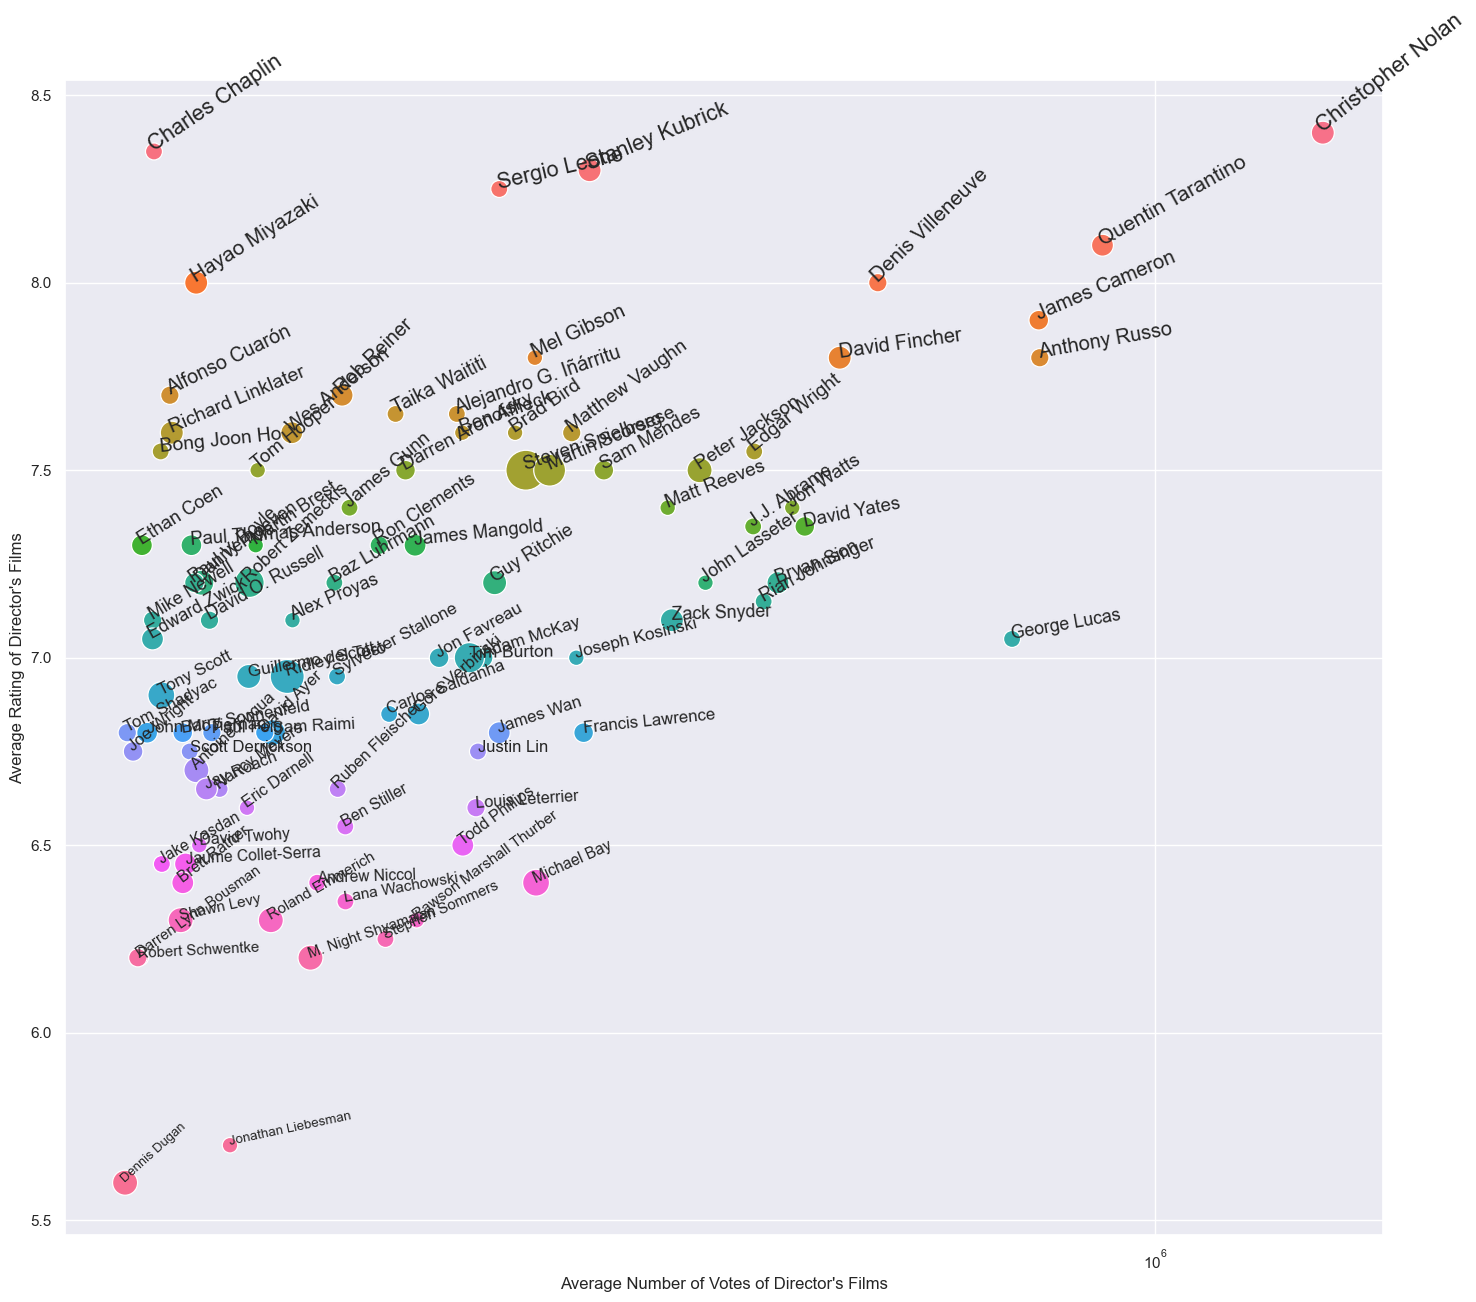

In [43]:
directors_successful = director_success[(director_success[("numVotes","median")]>150000)&\
                (director_success[("nconst","size")]>4)].sort_values(("averageRating","median"),ascending=False)
plt.figure(figsize=(17,15))
sns.scatterplot(y=directors_successful[("averageRating","median")],x=directors_successful[("numVotes","median")],
               s=directors_successful[("nconst","size")]*25,hue=directors_successful.index, legend=False,
               )
plt.xlabel("Average Number of Votes of Director's Films")
plt.ylabel("Average Rating of Director's Films")
plt.gca().set_xscale("log")
for names in directors_successful.T:
    plt.text(directors_successful.T[names][("numVotes","median")],
            directors_successful.T[names][("averageRating","median")],
             names,rotation=np.random.randint(0,45), rotation_mode="anchor",
             fontsize=directors_successful.T[names][("averageRating","median")]**1.3)

How about writers? Let’s do the same analysis for them:

- Now Jonathan Nolan, younger brother of Christopher Nolan takes the lead as he is the co-writer for many of his brother’s films
- Christopher Markus wrote many recent superhero movies, which is why he finds his spot more on the popular side (right)
- Andrew Stanton also wrote many successful animation series like Finding Nemo, Wall-E, Toy Story series

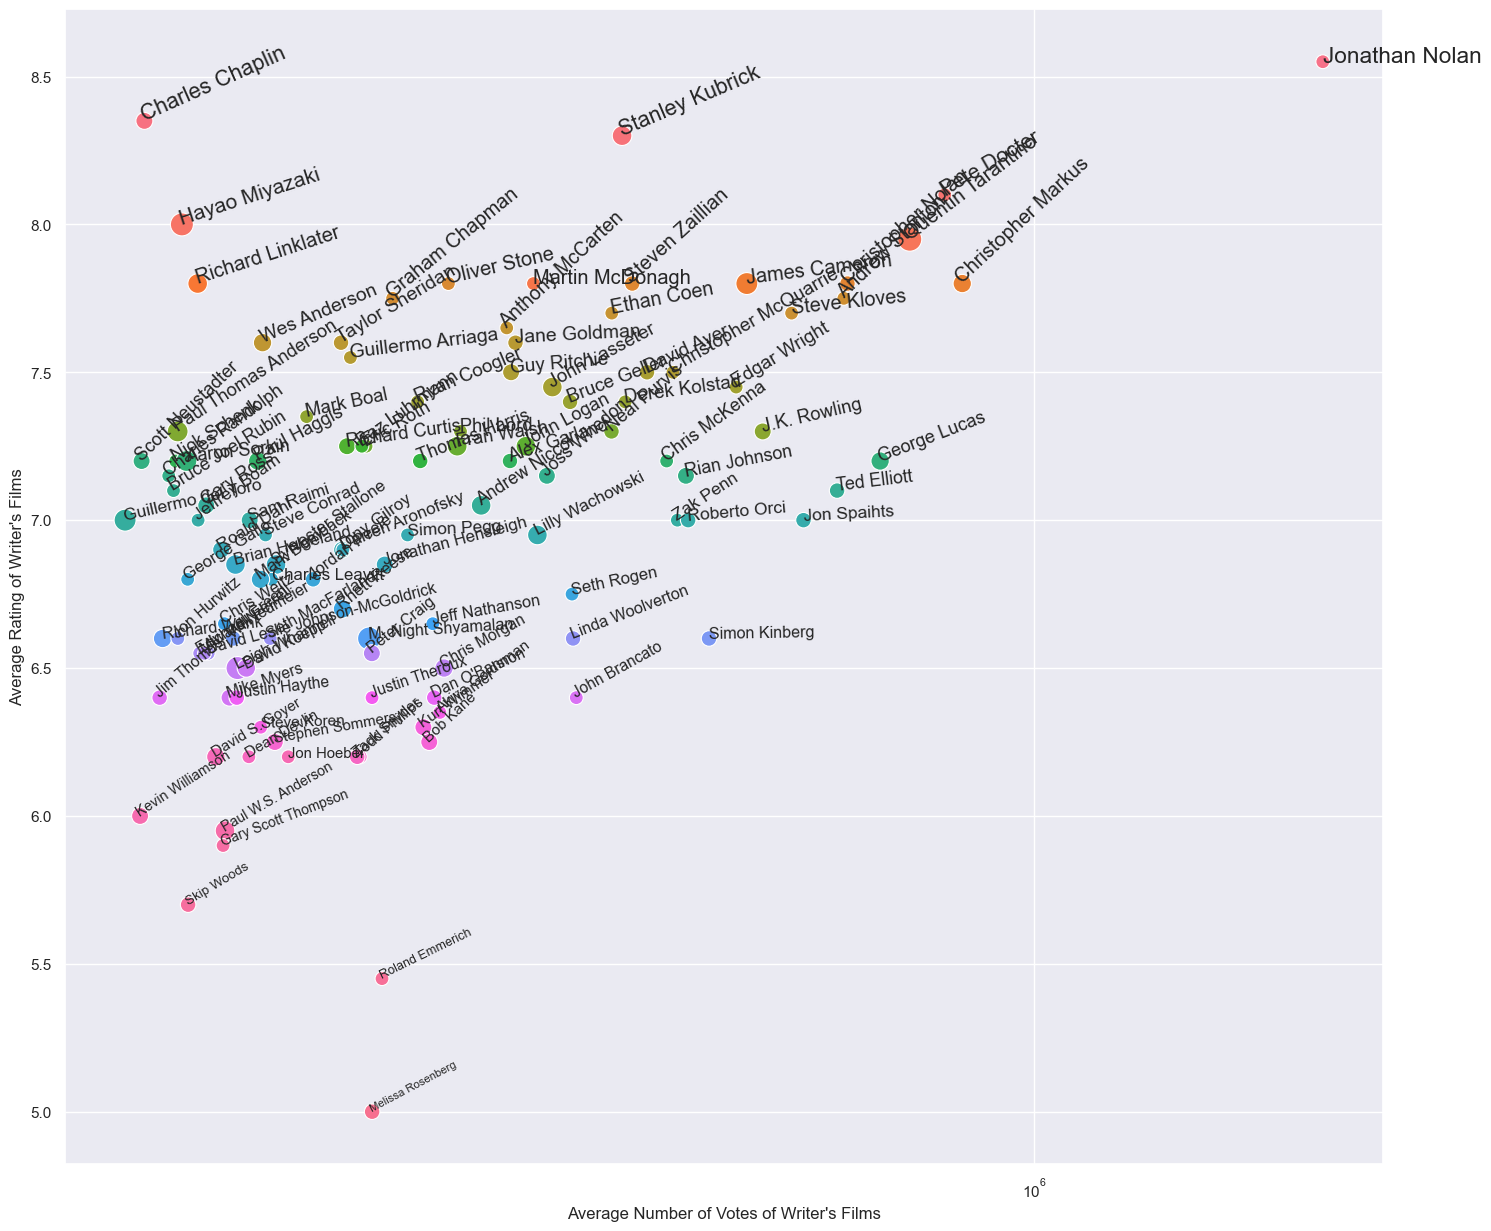

In [44]:
writer_temp = df_title_crew.drop("directors",axis=1)
writer_temp.columns = ["tconst","nconst"]
writer_temp.nconst = writer_temp.nconst.dropna().apply(lambda x: x.split(",")[0])
writers = pd.merge(pd.merge(pd.merge(df_title_basics,df_ratings,on="tconst"),
                          writer_temp,on="tconst"),
                 df_name_basics[["nconst","primaryName"]],on="nconst")
writer_success = writers[writers.numVotes>25000].groupby("primaryName").\
agg({"averageRating":[np.median],"numVotes":[np.median],"nconst":[np.size]}).\
sort_values(("averageRating","median"),ascending=False)
writers_successful = writer_success[(writer_success[("numVotes","median")]>150000)&\
                (writer_success[("nconst","size")]>=4)].sort_values(("averageRating","median"),ascending=False)
plt.figure(figsize=(17,15))
sns.scatterplot(y=writers_successful[("averageRating","median")],x=writers_successful[("numVotes","median")],
               s=writers_successful[("nconst","size")]*25,hue=writers_successful.index, legend=False,
               )
plt.xlabel("Average Number of Votes of Writer's Films")
plt.ylabel("Average Rating of Writer's Films")
plt.gca().set_xscale("log")
for names in writers_successful.T:
    plt.text(writers_successful.T[names][("numVotes","median")],
            writers_successful.T[names][("averageRating","median")],
             names,rotation=np.random.randint(0,45), rotation_mode="anchor",
             fontsize=writers_successful.T[names][("averageRating","median")]**1.3)
del writer_temp

### Title Principals Tables

title.principals.tsv.gz — Contains the principal cast/crew for titles

- **tconst** (string) — alphanumeric unique identifier of the title
- **ordering** (integer) — a number to uniquely identify rows for a given titleId
- **nconst** (string) — alphanumeric unique identifier of the name/person
- **category** (string) — the category of job that person was in
- **job** (string) — the specific job title if applicable, else ‘\N’
- **characters** (string) — the name of the character played if applicable, else ‘\N’

In [45]:
df_title_principals = pickle.load(open("title.principals.sav","rb"))
df_title_principals.head(10)

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,NaN,"[""Self""]"
1,tt0000001,2,nm0005690,director,NaN,NaN
2,tt0000001,3,nm0374658,cinematographer,director of photography,NaN
3,tt0000002,1,nm0721526,director,NaN,NaN
4,tt0000002,2,nm1335271,composer,NaN,NaN
5,tt0000003,1,nm0721526,director,NaN,NaN
6,tt0000003,2,nm1770680,producer,producer,NaN
7,tt0000003,3,nm1335271,composer,NaN,NaN
8,tt0000003,4,nm5442200,editor,NaN,NaN
9,tt0000004,1,nm0721526,director,NaN,NaN


It is the largest table amongst other IMDb table with a size of almost 2GB. It contains over **38 million** principal cast/crew members such as actors/actresses, writer, director, producer, editor, etc. which are associated with each film.

<Axes: ylabel='count'>

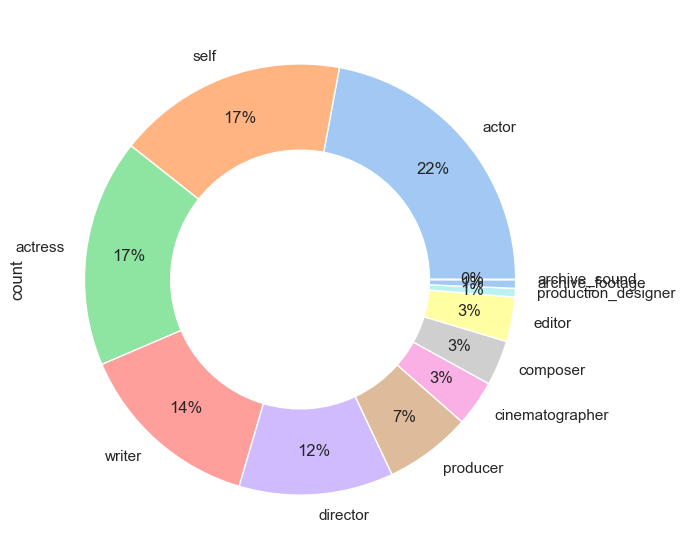

In [46]:
df_title_principals.category.value_counts().plot.pie(autopct="%.0f%%", 
                                                     pctdistance=0.8, figsize=(7,7),
                                                     wedgeprops=dict(width=0.4))

In [47]:
df_title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56035733 entries, 0 to 56035732
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tconst      object
 1   ordering    int64 
 2   nconst      object
 3   category    object
 4   job         object
 5   characters  object
dtypes: int64(1), object(5)
memory usage: 2.5+ GB


Let’s find out who has been the busiest in film industry:

- Ilaiyaraaja and **William Shakespeare** are the contributors with the highest numbers
- Brahmanandam was involved more than a thousand films as an actor
- Other than Shakespeare, not much-known personalities are there

In [48]:
inxs = df_title_principals.tconst.isin(df_title_basics.tconst)
use = df_title_principals[inxs]
top_names = use.nconst.value_counts().head(20)
top_names = pd.DataFrame(list(zip(top_names.index,top_names.values)),columns=["nconst","count"])
top_names = pd.merge(top_names,df_name_basics[["nconst","primaryName"]],on="nconst")
top_names["job_type"] = [use[use["nconst"] == i].category.value_counts().index[0] for i in top_names.nconst]
top_names

,nconst,count,primaryName,job_type
0,nm0000636,1103,William Shakespeare,writer
1,nm0006137,1012,Ilaiyaraaja,composer
2,nm0756966,948,Shôji Sakai,editor
3,nm0103977,786,Brahmanandam,actor
4,nm0648803,564,Matsunosuke Onoe,actor
5,nm0305182,548,Eddie Garcia,actor
6,nm0006982,541,Adoor Bhasi,actor
7,nm1930572,535,Kevin MacLeod,composer
8,nm0232490,513,Dong-Chun Hyeon,editor
9,nm0453459,511,Hui-su Kim,editor


### Title Akas Table

title.akas.tsv.gz — Contains the following information for titles:

- **titleId** (string) — a tconst, an alphanumeric unique identifier of the title
- **ordering** (integer) — a number to uniquely identify rows for a given titleId
- **title** (string) — the localized title
- **region** (string) — the region for this version of the title
- **language** (string) — the language of the title
- **types** (array) — Enumerated set of attributes for this alternative title. One or more of the following: “alternative”, “dvd”, “festival”, “tv”, “video”, “working”, “original”, “imdbDisplay”. New values may be added in the future without warning
- **attributes** (array) — Additional terms to describe this alternative title, not enumerated
- **isOriginalTitle** (boolean) — 0: not original title; 1: original title

In [49]:
df_title_akas = pickle.load(open("title.akas.sav","rb"))
df_title_akas.columns = ['tconst', 'ordering', 'title', 'region', 'language', 'types',
                         'attributes', 'isOriginalTitle']
df_title_akas.head()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,NaN,imdbDisplay,NaN,0.0
1,tt0000001,2,Carmencita,DE,NaN,NaN,literal title,0.0
2,tt0000001,3,Carmencita - spanyol tánc,HU,NaN,imdbDisplay,NaN,0.0
3,tt0000001,4,Καρμενσίτα,GR,NaN,imdbDisplay,NaN,0.0
4,tt0000001,5,Карменсита,RU,NaN,imdbDisplay,NaN,0.0


The table consist of the title’s also known as (AKA) information such as the variations of title in different countries. There are 21 million rows in the table.

In [50]:
df_title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35853106 entries, 0 to 35853105
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   tconst           object 
 1   ordering         int64  
 2   title            object 
 3   region           object 
 4   language         object 
 5   types            object 
 6   attributes       object 
 7   isOriginalTitle  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 2.1+ GB


We are only interested in movies, therefore AKAs table is inner joined with the **title basics** table

In [51]:
df_title_akas = pd.merge(df_title_akas,df_title_basics,on="tconst")
df_title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200101 entries, 0 to 3200100
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   tconst           object 
 1   ordering         int64  
 2   title            object 
 3   region           object 
 4   language         object 
 5   types            object 
 6   attributes       object 
 7   isOriginalTitle  float64
 8   titleType        object 
 9   primaryTitle     object 
 10  originalTitle    object 
 11  startYear        float64
 12  runtimeMinutes   object 
 13  genres           object 
dtypes: float64(2), int64(1), object(11)
memory usage: 341.8+ MB


Let’s now convert region codes into country names first. Then count them and visualise the Top 20:

- The count does not give a total number of cinemas or tickets, it gives how many different numbers of films showed in cinemas in the country (the higher the number the more various films shown)
- The US clearly wins the competition
- **India** is 6th in the Table
- Greece and Hungary find themselves in the middle of the table, better than I would expect, interesting

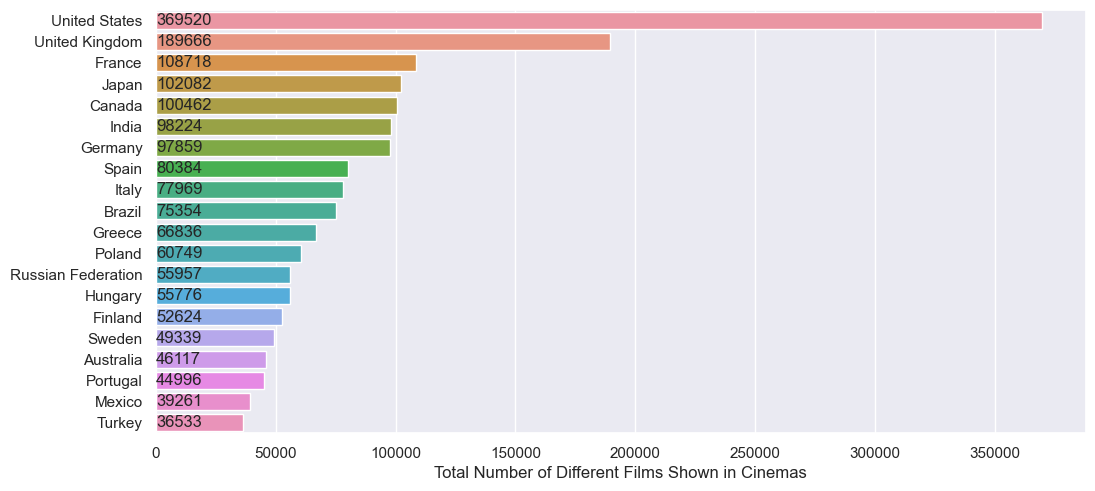

In [52]:
import pycountry
country_counts = df_title_akas.region.value_counts()
country_names = [pycountry.countries.get(alpha_2=coun).name for coun in country_counts.drop(["XWW","XWG"]).index[:20]]
counts = country_counts.drop(["XWW","XWG"]).values[:20]
plt.figure(figsize=(12,5.5))
sns.barplot(x=counts,y=country_names,orient="h")
plt.xlabel("Total Number of Different Films Shown in Cinemas")
for i,count in enumerate(counts):
    plt.text(100,i,count,va="center")

### Combine All Tables (for Movies Only)

Now let’s combine all tables by selecting only movie titles. In this way, we will reduce the dataset size and save it for future uses. It will be much faster to load and play with the final table:

In [ ]:
### df_movies = pd.merge(pd.merge(pd.merge(pd.merge(df_title_basics,df_ratings,on="tconst"),
###                           df_title_crew,on="tconst"),
###                      df_title_principals,on="tconst"),
###                  df_name_basics,on="nconst")
### df_movies.head()

Create a file called ```“df_movies.csv”``` and save the final table in .csv format

In [ ]:
### df_movies.to_csv("df_movies.csv")